In [1]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df = pd.get_dummies(insurance)
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [7]:
X = df.drop("charges", axis = 1)
Y = df["charges"]

In [8]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False


In [9]:
Y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [11]:
tf.random.set_seed(42)

insurance_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1)
])

insurance_model_1.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)

insurance_model_1.fit(X_train, Y_train, epochs = 500)

Epoch 1/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 9886842748928.0000 - mae: 9886842748928.0000
Epoch 2/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13600.9658 - mae: 13600.9658
Epoch 3/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step - loss: 13600.5508 - mae: 13600.5508
Epoch 4/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - loss: 13600.0781 - mae: 13600.0781
Epoch 5/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - loss: 13599.4844 - mae: 13599.4844
Epoch 6/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - loss: 13598.6475 - mae: 13598.6475
Epoch 7/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - loss: 13639.6416 - mae: 13639.6416
Epoch 8/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13595.0732 - mae: 13595.0732
Epoch 9/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step - loss: 13590.9619 - mae: 13590.9619
Epoch 10/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - loss: 13583.2012 - mae: 13583.2012
Epoch 11/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step - loss: 13568.2666 - mae: 13568.266

In [12]:
insurance_model_1.evaluate(X_test, Y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8384.3652 - mae: 8384.3652


[7909.787109375, 7909.787109375]

In [13]:
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1)
])

insurance_model_2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)

insurance_model_2.fit(X_train, Y_train, epochs = 500)

Epoch 1/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 17889.8867 - mae: 17889.8867  
Epoch 2/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step - loss: 13600.8779 - mae: 13600.8779
Epoch 3/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - loss: 13600.3271 - mae: 13600.3271
Epoch 4/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step - loss: 13599.6162 - mae: 13599.6162
Epoch 5/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - loss: 13598.5732 - mae: 13598.5732
Epoch 6/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step - loss: 13596.8594 - mae: 13596.8594
Epoch 7/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step - loss: 13593.8242 - mae: 13593.8242
Epoch 8/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step - loss: 13588.1846 - mae: 13588.1846
Epoch 9/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - loss: 13577.4170 - mae: 13577.4170
Epoch 10/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13556.5684 - mae: 13556.5684 
Epoch 11/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step - loss: 13515.8838 - mae: 13515.8838
Epoch 12/

In [14]:
insurance_model_2.evaluate(X_test, Y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8384.0781 - mae: 8384.0781 


[7909.6201171875, 7909.6201171875]

In [15]:
tf.random.set_seed(42)

insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "relu"),
    tf.keras.layers.Dense(1)
])

insurance_model_3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)

insurance_model_3.fit(X_train, Y_train, epochs = 500)

Epoch 1/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 24854.2891 - mae: 24854.2891  
Epoch 2/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - loss: 13600.9023 - mae: 13600.9023
Epoch 3/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - loss: 13600.4287 - mae: 13600.4287
Epoch 4/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 37396.3086 - mae: 37396.3086 7
Epoch 5/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step - loss: 13600.3867 - mae: 13600.3867
Epoch 6/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - loss: 13599.6387 - mae: 13599.6387
Epoch 7/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13628.8818 - mae: 13628.8818
Epoch 8/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13598.9580 - mae: 13598.9580
Epoch 9/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13598.6172 - mae: 13598.6172 
Epoch 10/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13598.2783 - mae: 13598.2783
Epoch 11/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step - loss: 13597.9375 - mae: 13597.9375
Epoch 12/500
34

In [16]:
insurance_model_3.evaluate(X_test, Y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13724.8213 - mae: 13724.8213 


[12887.857421875, 12887.857421875]

In [21]:
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "relu"),
    tf.keras.layers.Dense(1)
])

insurance_model_4.compile(
    optimizer='rmsprop',
    loss="mae",
    metrics=["mse", "mae"]
)

history_4 = insurance_model_4.fit(
    x=X_train,
    y=Y_train,
    epochs=500
)

Epoch 1/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 13595.3936 - mae: 13595.3936 - mse: 343271168.0000  
Epoch 2/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13575.2324 - mae: 13575.2324 - mse: 342683968.0000 
Epoch 3/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - loss: 13545.4619 - mae: 13545.4619 - mse: 341820544.0000
Epoch 4/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - loss: 13500.1162 - mae: 13500.1162 - mse: 340510336.0000
Epoch 5/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - loss: 13435.8086 - mae: 13435.8086 - mse: 338661120.0000
Epoch 6/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13348.9473 - mae: 13348.9473 - mse: 336177344.0000
Epoch 7/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13269.6465 - mae: 13269.6465 - mse: 335203936.0000 
Epoch 8/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13162.5605 - mae: 13162.5605 - mse: 333312096.0000 
Epoch 9/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12933.1064 - mae: 12933.1064 - mse: 325216160.0000

In [22]:
insurance_model_4.evaluate(X_test, Y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3317.6621 - mae: 3317.6621 - mse: 41467156.0000


[2892.74560546875, 37658832.0, 2892.74560546875]

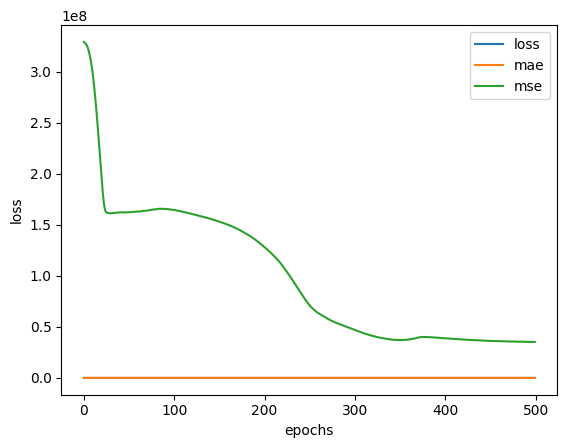

In [25]:
pd.DataFrame(history_4.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

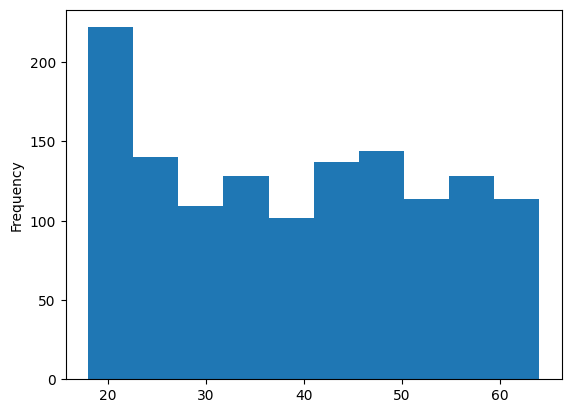

In [27]:
X["age"].plot(kind = "hist");

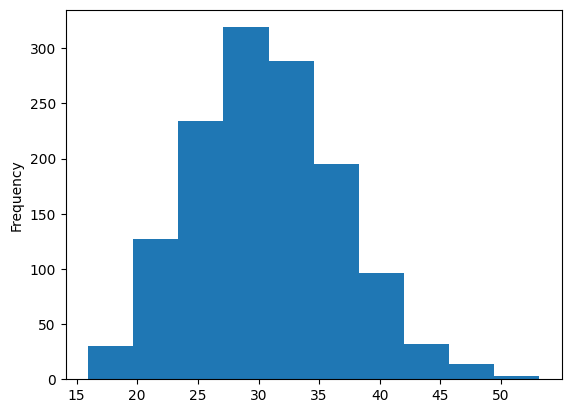

In [28]:
X["bmi"].plot(kind = "hist");

In [29]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

X = insurance.drop("charges", axis = 1)
y = insurance["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
ct.fit(X_train)

X_train_Normal = ct.transform(X_train)
X_test_Normal = ct.transform(X_test)

In [30]:
X_train.shape, X_train_Normal.shape

((1070, 6), (1070, 11))

In [32]:
insurance_model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = "relu"), 
    tf.keras.layers.Dense(100, activation = "relu"), 
    tf.keras.layers.Dense(10, activation = "relu"), 
    tf.keras.layers.Dense(1) 
])

insurance_model_5.compile(
    optimizer='rmsprop',
    loss="mae"
)

insurance_model_5.fit(X_train_Normal, y_train, epochs = 500)

Epoch 1/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 13296.8223   
Epoch 2/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - loss: 13273.0840
Epoch 3/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - loss: 13192.8379
Epoch 4/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step - loss: 13019.8213
Epoch 5/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step - loss: 12715.0518
Epoch 6/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step - loss: 12234.9346
Epoch 7/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - loss: 11549.6299
Epoch 8/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step - loss: 10713.1475
Epoch 9/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - loss: 9789.0986
Epoch 10/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step - loss: 8895.6514
Epoch 11/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - loss: 8229.3604
Epoch 12/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - loss: 7913.1855
Epoch 13/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step - loss: 7778.8491
Epoch 14/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step - loss: 76

In [33]:
insurance_model_5.evaluate(X_test_Normal, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1720.8215


1734.84619140625